<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 4. Математика для data sciense. Нетология.

Загрузить датасет из лекции 4, выбрать вектор в двухмерном пространстве на основе данного датасета и построить логистическую регрессию.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [44]:
url="http://yustiks.ru/dataset/heart.csv"
data=pd.read_csv(url)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [97]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [189]:
y = np.array(data.loc[:, ['target']])

res =pd.DataFrame(columns=['Pair','Accuracy','Coeffs','intercept'])
i, j, k =0,0,0

for col_1 in columns:
    j+=1
    for col_2 in columns:
        k+=1
        if col_1 != col_2 and j+k<len(columns)*2 :
            X = np.array(data.loc[:, [col_1,col_2]])
            model = LogisticRegression()
            model.fit(X, y)
            predicted_classes = model.predict(X)
            accuracy = np.round(accuracy_score(y.flatten(),predicted_classes),2)
            parameters = model.coef_
            c = model.intercept_
            name = col_1 + " & " + col_2
            res.loc[i] = [name] + [accuracy] + [parameters] + [c]
            i+=1
            #print(col_1, '&', col_2, accuracy, parameters,c)

/Users/olgamonahova/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [190]:
res = res.sort_values(by='Accuracy',ascending=False).head(10)
res

,Pair,Accuracy,Coeffs,intercept
1,age & cp,0.75,"[[-0.03821710478073364, 0.9756154106045922]]",[1.368168569474773]
11,age & thal,0.75,"[[-0.018712505510680162, -0.8783441351747066]]",[3.1997996266100523]
10,age & ca,0.74,"[[-0.014167640606512152, -0.8275351913410663]]",[1.5071683809411687]
20,sex & oldpeak,0.74,"[[-1.110481146215292, -0.8800431983637024]]",[1.8111719616156452]
7,age & exang,0.72,"[[-0.026649352227233258, -1.8066244025649643]]",[2.181382379996358]
19,sex & exang,0.72,"[[-1.0532859080658745, -1.7960947898954285]]",[1.4750020676322422]
18,sex & thalach,0.71,"[[-1.4115638175282625, 0.02832247211362443]]",[-3.0116576299491844]
8,age & oldpeak,0.70,"[[-0.015918022806327134, -0.8616846513336035]]",[1.8828301617142575]
9,age & slope,0.70,"[[-0.037350718876655246, 1.1445149201872913]]",[0.6192635251778067]
13,sex & cp,0.69,"[[-1.2976531083677616, 0.9863047934270326]]",[0.20061797605943588]


KeyError: 2

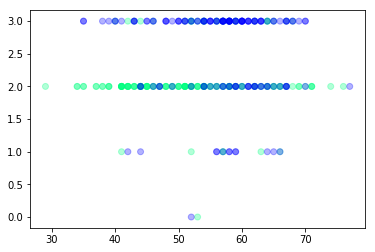

In [195]:
plt.scatter(x=data.age, y=data.thal , c=data.target, cmap = 'winter', alpha=0.3)

i=2
x_values = [30, 80]

y_values = -(res.intercept[i] + np.dot(res.Coeffs[i][0][0],x_values)) / res.Coeffs[i][0][1]

plt.plot(x_values, y_values)

In [170]:
y_values

array([[-2713.90371612,   -78.47209827]])

**Задание повышенного уровня**

Дана параметрическая модель человека. 

*   Посчитать угол, который образуется от вектора позвоночника до вектора горизонтали.
*   Рассчитать рост человека.



![alt text](https://github.com/yustiks/3D_model_test_task/blob/master/snapshot01.png?raw=true)

Параметрическую модель нужно попросить у меня (скину на почту)